In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_path = "/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/DAT-06-24/class material/Unit 3/data/iowa_housing/train.csv"

In [3]:
test_path = "/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/DAT-06-24/class material/Unit 3/data/iowa_housing/test.csv"

In [4]:
train = pd.read_csv(train_path)

In [5]:
train["SalePrice_ln"] = np.log(train["SalePrice"])

In [6]:
y_train = train[train.GrLivArea < 4500]["SalePrice_ln"]

In [7]:
y_train.shape

(1458,)

In [8]:
train.drop("Id", inplace = True, axis = 1)

In [9]:
test = pd.read_csv(test_path)
test.drop("Id", inplace = True, axis = 1)

In [10]:
train["BsmtQual"].isnull().sum()

37

In [11]:
train_cts = train.loc[:,(train.dtypes != "object")]

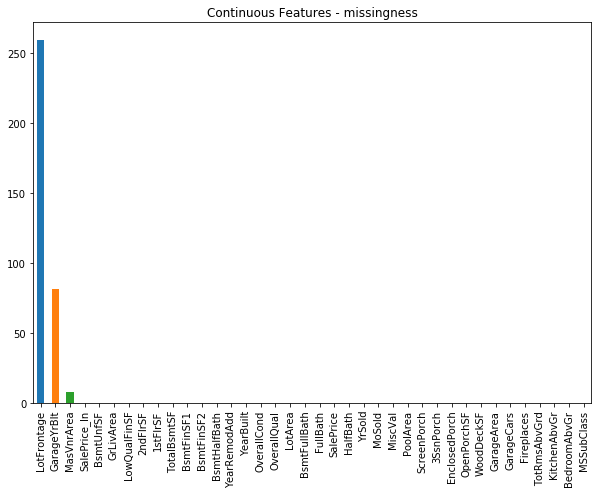

In [12]:
train_cts.isnull().sum().sort_values(ascending = False).plot(kind="bar", figsize = (10,7))
plt.title("Continuous Features - missingness")
plt.show()
#so for CTS lot frontage is most missing (~250)
#garageyrbuilt is second most missing (~100)
#masVnrArea is third (< 20)

In [13]:
train_discrete = train.loc[:,(train.dtypes == "object")]

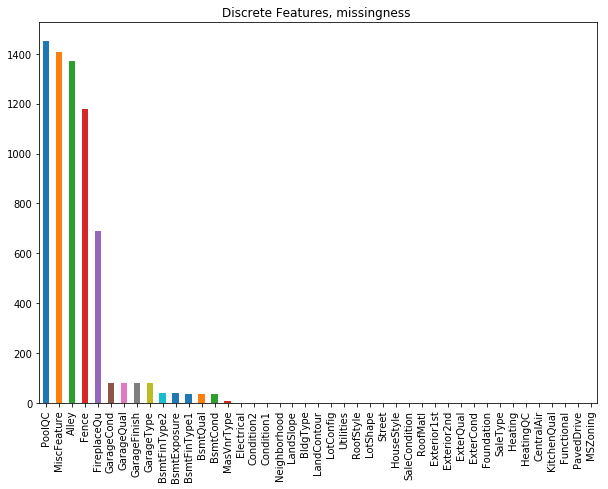

In [14]:
train_discrete.isnull().sum().sort_values(ascending = False).plot(kind="bar", figsize = (10,7))
plt.title("Discrete Features, missingness ")
plt.show()

# `Ordinal` Discrete Features 

In [15]:
# "!" means dont include
##ordered -- must use pd.apply()
# OverallQual
# OverallCond
# Condition1 
# Condition2 !
# ExterQual --> "ExteriorQuality"
# ExterCond --> "ExteriorCondition"
# BsmtQual --> "BasementQuality"
# BsmtCond --> "BasementCondition"
# BsmtExposure  --> "BasementExposure"
# HeatingQC --> "HeatingQuality"
# KitchenQual --> "KitchenQuality"
# FireplaceQu --> "FireplaceCount"
# GarageFinish --> "GarageRemodel"
# GarageQual --> "GarageQuality"
# GarageCond --> "GarageCondition"
# PoolQC ! 

In [16]:
set(train["BsmtQual"])

{'Ex', 'Fa', 'Gd', 'TA', nan}

In [17]:
train.drop("Condition2", axis=1, inplace = True)
test.drop("Condition2", axis=1, inplace = True)

In [18]:
train["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [19]:
def basement_quality(row):
    if row["BsmtQual"] == "Ex":
        return 4
    elif row["BsmtQual"] == "Gd":
        return 3
    elif row["BsmtQual"] == "Fa":
        return 1
    elif row["BsmtQual"] == "TA":
        return 2
    else:
        return 0

train["BasementQuality"] = train.apply(basement_quality, axis = 1)
test["BasementQuality"] = test.apply(basement_quality, axis = 1)

In [20]:
train.drop("BsmtQual",axis = 1, inplace = True)
test.drop("BsmtQual",axis = 1, inplace = True)

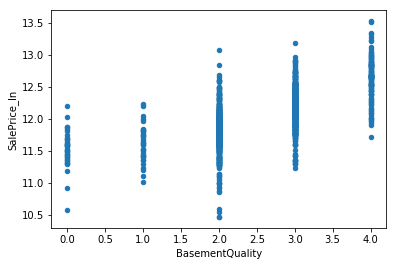

In [21]:
train.plot(kind="scatter",x = "BasementQuality",y = "SalePrice_ln")

In [22]:
train["BasementQuality"].value_counts()

2    649
3    618
4    121
0     37
1     35
Name: BasementQuality, dtype: int64

In [23]:
print("there are",len(train["BasementQuality"]) - train["BasementQuality"].value_counts().sum(),"nan")
print("i.e.",len(train["BasementQuality"]) - train["BasementQuality"].value_counts().sum(),"houses with no basement")

there are 0 nan
i.e. 0 houses with no basement


In [24]:
train["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [25]:
def basement_condition(row):
    if row["BsmtCond"] == "Ex":
        return 4
    elif row["BsmtCond"] == "Gd":
        return 3
    elif row["BsmtCond"] == "Fa":
        return 1
    elif row["BsmtCond"] == "TA":
        return 2
    else:
        return 0

train["BasementCondition"] = train.apply(basement_condition, axis = 1)
test["BasementCondition"] = test.apply(basement_condition, axis = 1)

In [26]:
train.drop("BsmtCond",axis = 1, inplace = True)
test.drop("BsmtCond",axis = 1, inplace = True)

In [27]:
train["BasementCondition"].value_counts()

2    1311
3      65
1      45
0      39
Name: BasementCondition, dtype: int64

In [28]:
train["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [29]:
def basement_exposure(row):
    if row["BsmtExposure"] == "Gd":
        return 4
    elif row["BsmtExposure"] == "Av":
        return 3
    elif row["BsmtExposure"] == "No":
        return 1
    elif row["BsmtExposure"] == "Mn":
        return 2
    else:
        return 0

train["BasementExposure"] = train.apply(basement_exposure, axis = 1)
test["BasementExposure"] = test.apply(basement_exposure, axis = 1)

In [30]:
train.drop("BsmtExposure",axis = 1, inplace = True)
test.drop("BsmtExposure",axis = 1, inplace = True)

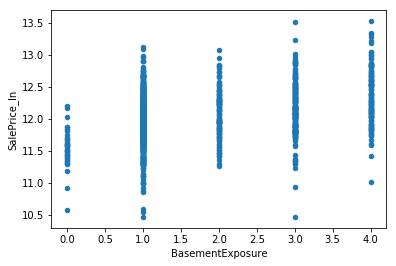

In [31]:
train.plot(kind = "scatter", x = "BasementExposure", y = "SalePrice_ln")

In [32]:
def kitchen_quality(row):
    if row["KitchenQual"] == "Ex":
        return 3
    elif row["KitchenQual"] == "Gd":
        return 2
    elif row["KitchenQual"] == "Fa":
        return 0
    elif row["KitchenQual"] == "TA":
        return 1

train["KitchenQuality"] = train.apply(kitchen_quality, axis = 1)
test["KitchenQuality"] = test.apply(kitchen_quality, axis = 1)

In [33]:
train.drop("KitchenQual",axis = 1, inplace = True)
test.drop("KitchenQual",axis = 1, inplace = True)

In [34]:
train["KitchenQuality"].value_counts()

1    735
2    586
3    100
0     39
Name: KitchenQuality, dtype: int64

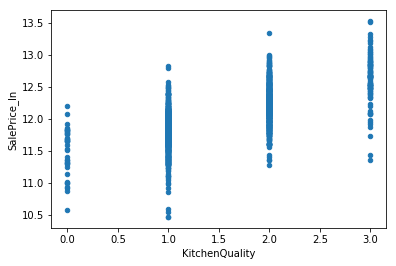

In [35]:
train.plot(kind = "scatter", x = "KitchenQuality", y = "SalePrice_ln")

In [36]:
def heating_quality(row):
    if row["HeatingQC"] == "Ex":
        return 4
    elif row["HeatingQC"] == "Gd":
        return 3
    elif row["HeatingQC"] == "Fa" or row["HeatingQC"] == "Po":
        return 1
    elif row["HeatingQC"] == "TA":
        return 2

train["HeatingQuality"] = train.apply(heating_quality, axis = 1)
test["HeatingQuality"] = test.apply(heating_quality, axis = 1)

In [37]:
train.drop("HeatingQC",axis = 1, inplace = True)
test.drop("HeatingQC",axis = 1, inplace = True)

In [38]:
train["HeatingQuality"].value_counts()

4    741
2    428
3    241
1     50
Name: HeatingQuality, dtype: int64

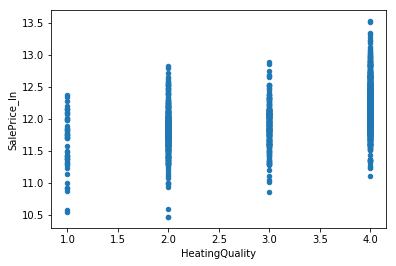

In [39]:
train.plot(kind ="scatter", x="HeatingQuality",y="SalePrice_ln")

In [40]:
def exterior_quality(row):
    if row["ExterQual"] == "Ex":
        return 3
    elif row["ExterQual"] == "Gd":
        return 2
    elif row["ExterQual"] == "Fa":
        return 0
    elif row["ExterQual"] == "TA":
        return 1

train["ExteriorQuality"] = train.apply(exterior_quality, axis = 1)
test["ExteriorQuality"] = test.apply(exterior_quality, axis = 1)

In [41]:
train.drop("ExterQual", axis = 1, inplace = True)
test.drop("ExterQual", axis = 1, inplace = True)

In [42]:
train["ExteriorQuality"].value_counts()

1    906
2    488
3     52
0     14
Name: ExteriorQuality, dtype: int64

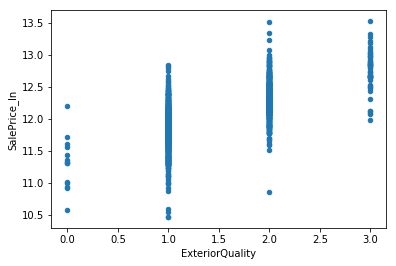

In [43]:
train.plot(kind = "Scatter", x = "ExteriorQuality", y = "SalePrice_ln")
#plt.show()

In [44]:
set(train["ExterCond"])

{'Ex', 'Fa', 'Gd', 'Po', 'TA'}

In [45]:
train["ExterCond"].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [46]:
def exterior_condition(row):
    if row["ExterCond"] == "Ex" or row["ExterCond"] == "Gd":
        return 2
    elif row["ExterCond"] == "Fa" or row["ExterCond"] == "Po":
        return 0
    elif row["ExterCond"] == "TA":
        return 1

train["ExteriorCondition"] = train.apply(exterior_condition, axis = 1)
test["ExteriorCondition"] = test.apply(exterior_condition, axis = 1)

In [47]:
train.drop("ExterCond",axis = 1, inplace = True)
test.drop("ExterCond",axis = 1, inplace = True)

In [48]:
train["ExteriorCondition"].value_counts()

1    1282
2     149
0      29
Name: ExteriorCondition, dtype: int64

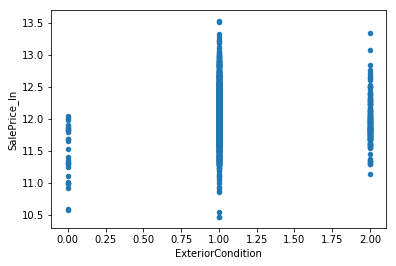

In [49]:
train.plot(kind = "Scatter", x = "ExteriorCondition", y = "SalePrice_ln")
#plt.show()

In [50]:
def fireplace_count(row):
    if row["FireplaceQu"] == "Ex":
        return 5
    elif row["FireplaceQu"] == "Gd":
        return 4
    elif row["FireplaceQu"] == "Fa":
        return 2
    elif row["FireplaceQu"] == "TA":
        return 3
    elif row["FireplaceQu"] == "Po":
        return 1
    else:
        return 0
    
train["FireplaceCount"] = train.apply(fireplace_count, axis = 1)
test["FireplaceCount"] = test.apply(fireplace_count, axis = 1)

In [51]:
train.drop("FireplaceQu",axis = 1, inplace = True)
test.drop("FireplaceQu",axis = 1, inplace = True)

In [52]:
train["FireplaceCount"].value_counts()

0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceCount, dtype: int64

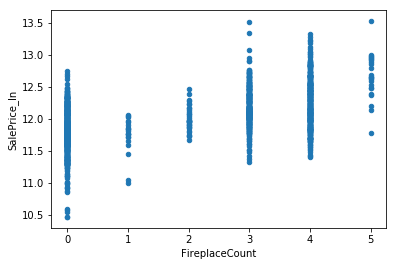

In [53]:
train.plot(kind = "scatter", x = "FireplaceCount", y = "SalePrice_ln")

In [54]:
set(train["GarageFinish"])

{'Fin', 'RFn', 'Unf', nan}

In [55]:
def garage_finish(row):
    if row["GarageFinish"] =="Fin" or row["GarageFinish"] =="RFn":
        return 2
    elif row["GarageFinish"] == "Unf":
        return 1
    else:
        return 0

train["GarageRemodel"] = train.apply(garage_finish, axis = 1)
test["GarageRemodel"] = test.apply(garage_finish, axis = 1)

In [56]:
train.drop("GarageFinish",axis = 1, inplace = True)
test.drop("GarageFinish",axis = 1, inplace = True)

In [57]:
train["GarageRemodel"].value_counts()

2    774
1    605
0     81
Name: GarageRemodel, dtype: int64

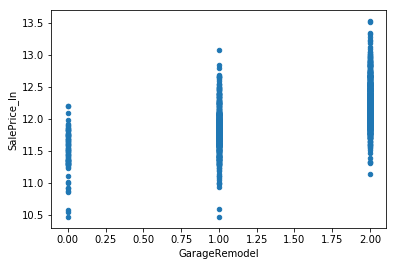

In [58]:
train.plot(kind = "scatter", x = "GarageRemodel", y = "SalePrice_ln")

In [59]:
def garage_quality(row):
    if row["GarageQual"] =="Ex": 
        return 5
    elif row["GarageQual"] == "Gd":
        return 4
    elif row["GarageQual"] == "TA":
        return 3
    elif row["GarageQual"] == "Fa":
        return 2
    elif row["GarageQual"] == "Po":
        return 1
    else:
        return 0

train["GarageQuality"] = train.apply(garage_quality, axis = 1)
test["GarageQuality"] = test.apply(garage_quality, axis = 1)

In [60]:
train.drop("GarageQual",axis = 1, inplace = True)
test.drop("GarageQual",axis = 1, inplace = True)

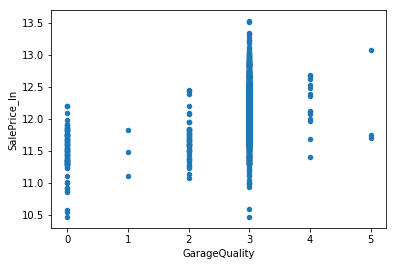

In [61]:
train.plot(kind = "scatter", x = "GarageQuality", y = "SalePrice_ln")

In [62]:
def garage_condition(row):
    if row["GarageCond"] =="Ex": 
        return 5
    elif row["GarageCond"] == "Gd":
        return 4
    elif row["GarageCond"] == "TA":
        return 3
    elif row["GarageCond"] == "Fa":
        return 2
    elif row["GarageCond"] == "Po":
        return 1
    else:
        return 0

train["GarageCondition"] = train.apply(garage_condition, axis = 1)
test["GarageCondition"] = test.apply(garage_condition, axis = 1)

In [63]:
train.drop("GarageCond",axis = 1, inplace = True)
test.drop("GarageCond",axis = 1, inplace = True)

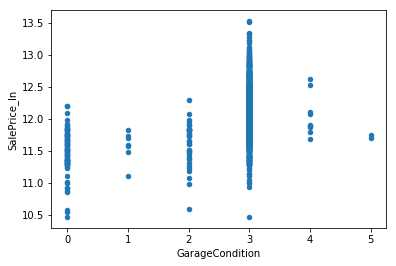

In [64]:
train.plot(kind = "scatter", x = "GarageCondition", y = "SalePrice_ln")

In [65]:
set(train["PoolQC"])

{'Ex', 'Fa', 'Gd', nan}

In [66]:
train["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [67]:
train.drop("PoolQC",axis = 1, inplace = True)
test.drop("PoolQC",axis = 1, inplace = True)

# `Unordered` Discrete Categorical Features

In [68]:
# "!" means dont include
##unordered -- must use pd.get_dummies()
# MSSubClass 
# MSZoning
# LandContour
# LotConfig
# Neighborhood
# LandSlope
# BldgType
# HouseStyle
# RoofStyle
# RoofMatl
# Exterior1st
# Foundation
# BsmtFinType1
# Heating
# CentralAir
# Electrical
# GarageType
# PavedDrive
# Fence
# SaleType
# SaleCondition


# Street ! 
# Alley !
# LotShape !
# Utilities !
# Exterior2nd!
# MasVnrType !
# BsmtFinType2 !
# Functional !
# MiscFeature !

In [69]:
train.drop(["Street","Alley","LotShape",
            "Utilities","Exterior2nd","MasVnrType",
           "BsmtFinType2","Functional","MiscFeature"], axis = 1, inplace = True)
test.drop(["Street","Alley","LotShape",
            "Utilities","Exterior2nd","MasVnrType",
           "BsmtFinType2","Functional","MiscFeature"], axis = 1, inplace = True)

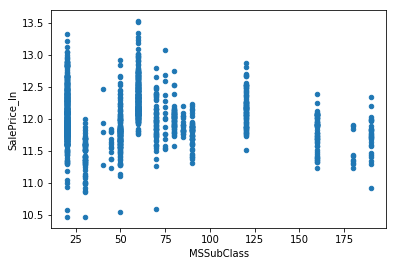

In [70]:
train.plot(kind = "scatter", x = "MSSubClass" , y = "SalePrice_ln")

In [71]:
train["MSSubClass"].astype("str").head()

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: object

In [72]:
train.MSSubClass = train.MSSubClass.astype("category")
test.MSSubClass = test.MSSubClass.astype("category")

In [73]:
transformed_MSSubClass_train = train.groupby("MSSubClass").MSSubClass.transform("count")
transformed_MSSubClass_test = test.groupby("MSSubClass").MSSubClass.transform("count")

In [74]:
train["MSSubClass"] = np.where(transformed_MSSubClass_train < 25, "Other", train["MSSubClass"])
test["MSSubClass"] = np.where(transformed_MSSubClass_test < 25, "Other", test["MSSubClass"])

In [75]:
train["MSSubClass"].value_counts()

20       536
60       299
50       144
120       87
30        69
160       63
Other     62
70        60
80        58
90        52
190       30
Name: MSSubClass, dtype: int64

In [76]:
train["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [77]:
train.MSZoning = train.MSZoning.astype("category")
test.MSZoning = test.MSZoning.astype("category")

In [78]:
transformed_MSZoning_train = train.groupby("MSZoning").MSZoning.transform("count")
transformed_MSZoning_test = test.groupby("MSZoning").MSZoning.transform("count")

In [79]:
train["MSZoning"] = np.where(transformed_MSZoning_train < 25, "Other", train["MSZoning"])
test["MSZoning"] = np.where(transformed_MSZoning_test < 25, "Other", test["MSZoning"])

In [80]:
train.shape

(1460, 70)

In [81]:
test.shape

(1459, 68)

In [82]:
train["MSZoning"].value_counts()

RL       1151
RM        218
FV         65
Other      26
Name: MSZoning, dtype: int64

In [83]:
train["LotConfig"].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [84]:
train.LotConfig = train.LotConfig.astype("category")
test.LotConfig = test.LotConfig.astype("category")

In [85]:
transformed_LotConfig_train = train.groupby("LotConfig").LotConfig.transform("count")
transformed_LotConfig_test = test.groupby("LotConfig").LotConfig.transform("count")

In [86]:
train["LotConfig"] = np.where(transformed_LotConfig_train < 50, "Other", train["LotConfig"])
test["LotConfig"] = np.where(transformed_LotConfig_test < 25, "Other", test["LotConfig"])

In [87]:
train["LotConfig"].value_counts()

Inside     1052
Corner      263
CulDSac      94
Other        51
Name: LotConfig, dtype: int64

In [88]:
train["Neighborhood"].value_counts().head()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Name: Neighborhood, dtype: int64

In [89]:
train.Neighborhood = train.Neighborhood.astype("category")
test.Neighborhood = test.Neighborhood.astype("category")

In [90]:
transformed_Neighborhood_train = train.groupby("Neighborhood").Neighborhood.transform("count")
transformed_Neighborhood_test = test.groupby("Neighborhood").Neighborhood.transform("count")

In [91]:
train["Neighborhood"] = np.where(transformed_Neighborhood_train < 25, "Other", train["Neighborhood"])
test["Neighborhood"] = np.where(transformed_Neighborhood_test < 25, "Other", test["Neighborhood"])

In [92]:
train["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
Other       72
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Name: Neighborhood, dtype: int64

In [93]:
train["LandSlope"].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [94]:
train.LandSlope = train.LandSlope.astype("category")
test.LandSlope = test.LandSlope.astype("category")

In [95]:
transformed_LandSlope_test = test.groupby("LandSlope").LandSlope.transform("count")
transformed_LandSlope_train = train.groupby("LandSlope").LandSlope.transform("count")

In [96]:
train["LandSlope"] = np.where(transformed_LandSlope_train < 70, "Steep", train["LandSlope"])
test["LandSlope"] = np.where(transformed_LandSlope_test < 25, "Steep", test["LandSlope"])

In [97]:
train["LandSlope"].value_counts()

Gtl      1382
Steep      78
Name: LandSlope, dtype: int64

In [98]:
test["HouseStyle"].value_counts()

1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64

In [99]:
train.HouseStyle = train.HouseStyle.astype("category")
test.HouseStyle = test.HouseStyle.astype("category")

In [100]:
transformed_HouseStyle_train = train.groupby("HouseStyle").HouseStyle.transform("count")
transformed_HouseStyle_test = test.groupby("HouseStyle").HouseStyle.transform("count")

In [101]:
train["HouseStyle"] = np.where(transformed_HouseStyle_train < 25, "Other", train["HouseStyle"])
test["HouseStyle"] = np.where(transformed_HouseStyle_test < 25, "Other", test["HouseStyle"])

In [102]:
train.shape

(1460, 70)

In [103]:
test.shape

(1459, 68)

In [104]:
train["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
Other      33
Name: HouseStyle, dtype: int64

In [105]:
train["RoofStyle"].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [106]:
train.RoofStyle = train.RoofStyle.astype("category")
test.RoofStyle = test.RoofStyle.astype("category")

In [107]:
transformed_RoofStyle_train = train.groupby("RoofStyle").RoofStyle.transform("count")
transformed_RoofStyle_test = test.groupby("RoofStyle").RoofStyle.transform("count")

In [108]:
test["RoofStyle"] = np.where((transformed_RoofStyle_test != 13) & (transformed_RoofStyle_test < 25), "Other", test["RoofStyle"])
train["RoofStyle"] = np.where((transformed_RoofStyle_train != 13) & (transformed_RoofStyle_train < 25), "Other", train["RoofStyle"])

In [109]:
train["RoofStyle"].value_counts()

Gable    1141
Hip       286
Other      20
Flat       13
Name: RoofStyle, dtype: int64

In [110]:
train["RoofMatl"].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Roll          1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64

In [111]:
train.RoofMatl = train.RoofMatl.astype("category")
test.RoofMatl = test.RoofMatl.astype("category")

In [112]:
transformed_RoofMatl_train = train.groupby("RoofMatl").RoofMatl.transform("count")
transformed_RoofMatl_test = test.groupby("RoofMatl").RoofMatl.transform("count")

In [113]:
train["RoofMatl"] = np.where(transformed_RoofMatl_train < 25, "Other", train["RoofMatl"])
test["RoofMatl"] = np.where(transformed_RoofMatl_test < 25, "Other", test["RoofMatl"])

In [114]:
train["RoofMatl"].value_counts()

CompShg    1434
Other        26
Name: RoofMatl, dtype: int64

In [115]:
train.Exterior1st = train.Exterior1st.astype("category")
test.Exterior1st = test.Exterior1st.astype("category")

In [116]:
transformed_Exterior1st_train = train.groupby("Exterior1st").Exterior1st.transform("count")
transformed_Exterior1st_test = test.groupby("Exterior1st").Exterior1st.transform("count")

In [117]:
train["Exterior1st"] = np.where(transformed_Exterior1st_train < 25, "Other", train["Exterior1st"])
test["Exterior1st"] = np.where(transformed_Exterior1st_test < 25, "Other", test["Exterior1st"])

In [118]:
train["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
Other       27
WdShing     26
Stucco      25
Name: Exterior1st, dtype: int64

In [119]:
train.Foundation = train.Foundation.astype("category")
test.Foundation = test.Foundation.astype("category")

In [120]:
train.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [121]:
transformed_Foundation_train = train.groupby("Foundation").Foundation.transform("count")
transformed_Foundation_test = test.groupby("Foundation").Foundation.transform("count")

In [122]:
train["Foundation"] = np.where(transformed_Foundation_train < 25, "Other", train["Foundation"])
test["Foundation"] = np.where(transformed_Foundation_test < 25, "Other", test["Foundation"])

In [123]:
train["Foundation"].value_counts()

PConc     647
CBlock    634
BrkTil    146
Other      33
Name: Foundation, dtype: int64

In [124]:
train["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [125]:
train["BsmtFinType1"].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [126]:
train["BsmtFinType1"].isnull().sum()

37

In [127]:
train["BsmtFinType1"].fillna("None",inplace = True)
test["BsmtFinType1"].fillna("None",inplace = True)

In [128]:
train["BsmtFinType1"].isnull().sum()

0

In [129]:
train["BsmtFinType1"].value_counts()

Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [130]:
train["Heating"].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [131]:
train.Heating = train.Heating.astype("category")
test.Heating = test.Heating.astype("category")

In [132]:
transformed_Heating_train = train.groupby("Heating").Heating.transform("count")
transformed_Heating_test = test.groupby("Heating").Heating.transform("count")

In [133]:
train["Heating"] = np.where(transformed_Heating_train < 25, "Other", train["Heating"])
test["Heating"] = np.where(transformed_Heating_test < 25, "Other", test["Heating"])

In [134]:
train["Heating"].value_counts()

GasA     1428
Other      32
Name: Heating, dtype: int64

In [135]:
train.Electrical = train.Electrical.astype("category")
test.Electrical = test.Electrical.astype("category")

In [136]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [137]:
transformed_Electrical_train = train.groupby("Electrical").Electrical.transform("count")
transformed_Electrical_test = test.groupby("Electrical").Electrical.transform("count")

In [138]:
train["Electrical"] = np.where(transformed_Electrical_train < 28, "Other", train["Electrical"])
test["Electrical"] = np.where(transformed_Electrical_test < 28, "Other", test["Electrical"])

In [139]:
train["Electrical"].value_counts()

SBrkr    1334
FuseA      94
Other      31
Name: Electrical, dtype: int64

In [140]:
train["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [141]:
train["GarageType"].fillna("None",inplace = True)
test["GarageType"].fillna("None",inplace = True)

In [142]:
train["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [143]:
train.GarageType = train.GarageType.astype("category")
test.GarageType = test.GarageType.astype("category")

In [144]:
transformed_GarageType_train = train.groupby("GarageType").GarageType.transform("count")
transformed_GarageType_test = test.groupby("GarageType").GarageType.transform("count")

In [145]:
train["GarageType"] = np.where(transformed_GarageType_train < 25, "Other", train["GarageType"])
test["GarageType"] = np.where(transformed_GarageType_test < 25, "Other", test["GarageType"])

In [146]:
train["Fence"].fillna("None",inplace = True)
test["Fence"].fillna("None",inplace = True)

In [147]:
train["Fence"].value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [148]:
train.SaleType = train.SaleType.astype("category")
test.SaleType = test.SaleType.astype("category")

In [149]:
transformed_SaleType_train = train.groupby("SaleType").SaleType.transform("count")
transformed_SaleType_test = test.groupby("SaleType").SaleType.transform("count")

In [150]:
train["SaleType"] = np.where(transformed_SaleType_train < 25, "Other", train["SaleType"])
test["SaleType"] = np.where(transformed_SaleType_test < 25, "Other", test["SaleType"])

In [151]:
train["SaleType"].value_counts()

WD       1267
New       122
COD        43
Other      28
Name: SaleType, dtype: int64

In [152]:
train["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [153]:
train.SaleCondition = train.SaleCondition.astype("category")
test.SaleCondition = test.SaleCondition.astype("category")

In [154]:
transformed_SaleCondition_train = train.groupby("SaleCondition").SaleCondition.transform("count")
transformed_SaleCondition_test = test.groupby("SaleCondition").SaleCondition.transform("count")

In [155]:
train["SaleCondition"] = np.where(transformed_SaleCondition_train < 25, "Other", train["SaleCondition"])
test["SaleCondition"] = np.where(transformed_SaleCondition_test < 25, "Other", test["SaleCondition"])

In [156]:
train["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Other        36
Name: SaleCondition, dtype: int64

# `CTS` Features

In [157]:
train.shape

(1460, 70)

In [158]:
2 ** 70

1180591620717411303424

In [159]:
save_list = ((train.columns != "Id") & (train.dtypes != "object")).index.tolist()

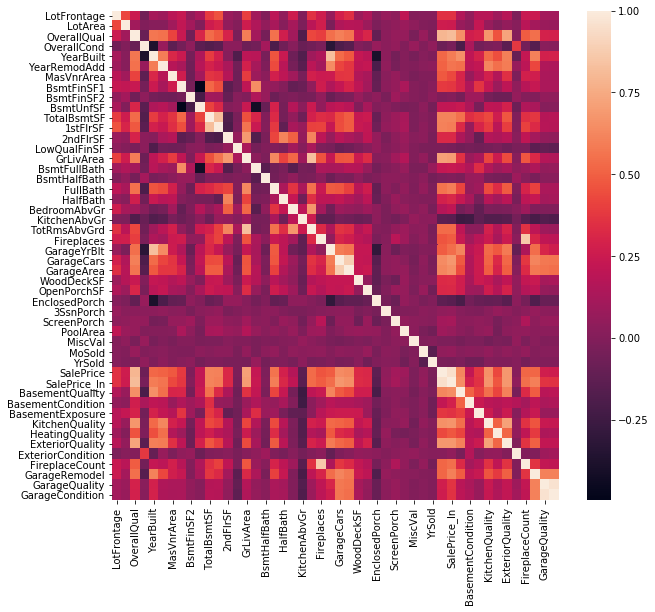

In [160]:
import seaborn as sns
plt.figure(figsize = (10,9))
sns.heatmap(train.loc[:, (train.columns != "Id") & (train.dtypes != "object")].corr())
plt.show()

### Impute missing values

In [161]:
empty_LotFrontage = []
LotFrontage_median = train["LotFrontage"].median()

for items in list(train["LotFrontage"]):
    if "." not in str(items):
        empty_LotFrontage.append(LotFrontage_median)
    else:
        empty_LotFrontage.append(items)
        
train["LotFrontage"] = empty_LotFrontage

In [162]:
empty_Kitchen = []
Kitchen_median = test["KitchenQuality"].median()

for items in list(test["KitchenQuality"]):
    if "." not in str(items):
        empty_Kitchen.append(Kitchen_median)
    else:
        empty_Kitchen.append(items)
        
test["KitchenQuality"] = empty_Kitchen

In [163]:
empty_baths = []
baths_median = test["BsmtFullBath"].median()

for items in list(test["BsmtFullBath"]):
    if "." not in str(items):
        empty_baths.append(baths_median)
    else:
        empty_baths.append(items)
        
test["BsmtFullBath"] = empty_baths

In [164]:
empty_LotFrontage = []
LotFrontage_median = train["LotFrontage"].median()

for items in list(test["LotFrontage"]):
    if "." not in str(items):
        empty_LotFrontage.append(LotFrontage_median)
    else:
        empty_LotFrontage.append(items)
        
test["LotFrontage"] = empty_LotFrontage

In [165]:
empty_GarageYrBlt = []
GarageYrBlt_mode = train["GarageYrBlt"].mode()[0]

for items in list(train["GarageYrBlt"]):
    if "." not in str(items):
        empty_GarageYrBlt.append(GarageYrBlt_mode)
    else:
        empty_GarageYrBlt.append(items)
        
train["GarageYrBlt"] = empty_GarageYrBlt

In [166]:
empty_GarageYrBlt = []
GarageYrBlt_mode = train["GarageYrBlt"].mode()[0]

for items in list(test["GarageYrBlt"]):
    if "." not in str(items):
        empty_GarageYrBlt.append(GarageYrBlt_mode)
    else:
        empty_GarageYrBlt.append(items)
        
test["GarageYrBlt"] = empty_GarageYrBlt

In [167]:
empty_MasVnrArea = []
MasVnrArea_mode = train["MasVnrArea"].mode()[0]

for items in list(train["MasVnrArea"]):
    if "." not in str(items):
        empty_MasVnrArea.append(MasVnrArea_mode)
    else:
        empty_MasVnrArea.append(items)
        
train["MasVnrArea"] = empty_MasVnrArea

In [168]:
empty_MasVnrArea = []
MasVnrArea_mode = train["MasVnrArea"].mode()[0]

for items in list(test["MasVnrArea"]):
    if "." not in str(items):
        empty_MasVnrArea.append(MasVnrArea_mode)
    else:
        empty_MasVnrArea.append(items)
        
test["MasVnrArea"] = empty_MasVnrArea

### remove outliers

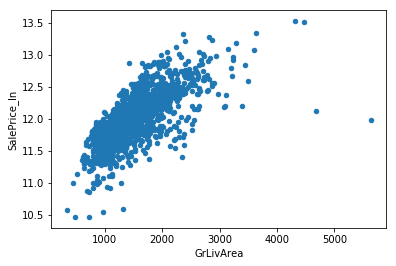

In [169]:
train.plot(kind = "scatter", x ="GrLivArea", y = "SalePrice_ln")

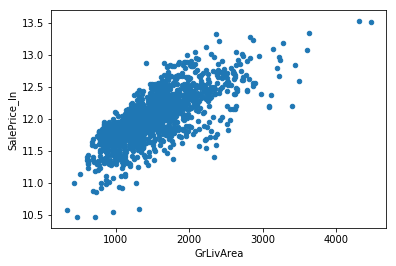

In [170]:
train[train.GrLivArea < 4500].plot(kind = "scatter", x ="GrLivArea", y = "SalePrice_ln")

In [171]:
train = train[train.GrLivArea < 4500]
#train.drop(["SalePrice","SalePrice_ln"], axis = 1, inplace = True)

In [172]:
discrete_ordered = ["ExteriorQuality",
"ExteriorCondition",
"BasementQuality",
"BasementCondition",
"BasementExposure",
"HeatingQuality",
"KitchenQuality",
"FireplaceCount",
"GarageRemodel",
"GarageQuality",
"GarageCondition",
"OverallQual",
"OverallCond",
"Condition1"]

In [173]:
cts_columns = list(set(train.loc[:, (train.columns != "SalePrice") 
                                 &(train.columns != "SalePrice_ln") & (train.dtypes != "object")].columns) - set(discrete_ordered))

In [174]:
train[cts_columns].columns.tolist()

['1stFlrSF',
 'BsmtUnfSF',
 'OpenPorchSF',
 'YrSold',
 'GrLivArea',
 'BedroomAbvGr',
 'MoSold',
 'KitchenAbvGr',
 'GarageCars',
 'YearBuilt',
 'EnclosedPorch',
 'WoodDeckSF',
 'MiscVal',
 'FullBath',
 '2ndFlrSF',
 'LowQualFinSF',
 'ScreenPorch',
 '3SsnPorch',
 'PoolArea',
 'LotFrontage',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'BsmtFullBath',
 'HalfBath',
 'Fireplaces',
 'LotArea',
 'MasVnrArea',
 'GarageArea',
 'TotRmsAbvGrd',
 'YearRemodAdd',
 'TotalBsmtSF',
 'GarageYrBlt']

## Transform skewed numeric features

In [175]:
# skew_dict = {}

# for items in train[cts_columns].columns.tolist():
#     skew_dict[items] = train[items].skew()   

In [176]:
# for features in skew_dict.keys():
#     if np.abs(skew_dict[features]) > 0.75:
#         train[features+"_ln"] = np.log(1+train[features])
#         train.drop(features, axis = 1, inplace = True)

In [177]:
# for features in skew_dict.keys():
#     if np.abs(skew_dict[features]) > 0.75:
#         test[features+"_ln"] = np.log(1+test[features])
#         test.drop(features, axis = 1, inplace = True)

# Standardized / Make Dummies 

In [178]:
num_cols = train.select_dtypes(include=np.number).columns.tolist()

In [179]:
num_cols = list((set(num_cols) - set(["SalePrice","SalePrice_ln"])))

In [180]:
# # standardize data
num_cols = train.select_dtypes(include=np.number).columns.tolist()
train_std = (train[num_cols] - train[num_cols].mean()) / train[num_cols].std()
train_std.shape
train_std = pd.get_dummies(train, drop_first=True)

In [181]:
#num_cols1 = test.select_dtypes(include=np.number).columns.tolist()
test_std = (test[list((set(num_cols) - set(["SalePrice","SalePrice_ln"])))] - train[list((set(num_cols) - set(["SalePrice","SalePrice_ln"])))].mean()) / train[list((set(num_cols) - set(["SalePrice","SalePrice_ln"])))].std()
test_std.shape
test_std = pd.get_dummies(test, drop_first=True)

In [182]:
train_std.shape

(1458, 146)

In [183]:
2 ** 127

170141183460469231731687303715884105728

In [184]:
test_std.drop('SaleCondition_Family', inplace = True, axis = 1)

In [185]:
set(train_std.columns) - set(test_std.columns)

{'Exterior1st_Stucco',
 'Neighborhood_ClearCr',
 'Neighborhood_SWISU',
 'RoofStyle_Gable',
 'SalePrice',
 'SalePrice_ln'}

In [186]:
train_std.drop("Fireplaces", axis = 1, inplace = True)
test_std.drop("Fireplaces", axis = 1, inplace = True)

In [187]:
train_std.drop("GarageCars", axis = 1, inplace = True)
test_std.drop("GarageCars", axis = 1, inplace = True)

# Feature Engineering

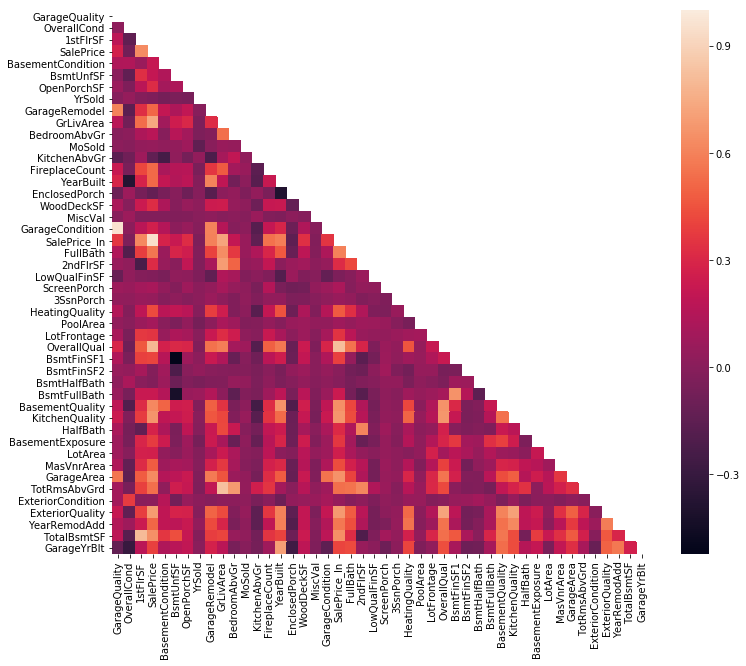

In [188]:
mask = np.zeros_like(train_std[list(set(save_list) & set(train_std.columns))].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (12,10))
sns.heatmap(train_std[list(set(save_list) & set(train_std.columns))].corr(), mask = mask)
plt.show()

#we want to group similar variables together
    #if there are grouped variables, Lasso tends to select one variable
    #from each group, ignoring the others

### Total Porch SF 

In [189]:
#train["WoodDeckSF_ln"]

In [190]:
# WoodDeckSF_ln
# OpenPorchSF_ln
# EnclosedPorch_ln
# 3SsnPorch_ln
# ScreenPorch_ln
#train_std.columns

In [191]:
# train[["WoodDeckSF",
#            "OpenPorchSF",
# "EnclosedPorch",
# "3SsnPorch",
# "ScreenPorch"]].corr()

In [192]:
train_std["porch_sqft"] = train_std["WoodDeckSF"] + train_std["OpenPorchSF"] 

In [193]:
test_std["porch_sqft"] = test_std["WoodDeckSF"] + test_std["OpenPorchSF"]

In [194]:
train_std.drop(["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"], axis = 1, inplace = True)

In [195]:
test_std.drop(["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"], axis = 1, inplace = True)

In [196]:
#train_std[["porch_sqft","SalePrice"]].corr()

### Total Bathrooms: Sum of Above Ground Full, Half Baths, Basement Full and Half Bath.

In [197]:
# BsmtFullBath
# FullBath
# HalfBath
train_std.drop("BsmtHalfBath",axis = 1, inplace = True)
test_std.drop("BsmtHalfBath",axis = 1, inplace = True)

In [198]:
train_std["total_baths"] = train_std["FullBath"] + train["HalfBath"] + train["BsmtFullBath"]
test_std["total_baths"] = test_std["FullBath"] + test["HalfBath"] + test["BsmtFullBath"]

In [199]:
train_std.drop(["BsmtFullBath","FullBath","HalfBath"], axis = 1, inplace = True)
test_std.drop(["BsmtFullBath","FullBath","HalfBath"], axis = 1, inplace = True)

In [200]:
train_std.shape

(1458, 137)

In [201]:
test_std.shape

(1459, 135)

### drop unfinished basement area

In [202]:
#train[["BsmtUnfSF","BsmtFinSF2","BsmtFinSF1","TotalBsmtSF","BasementQuality","BasementCondition", "SalePrice"]].corr()

In [203]:
train_std.drop(["BsmtUnfSF","BsmtFinSF2","BsmtFinSF1"],axis = 1, inplace = True)
test_std.drop(["BsmtUnfSF","BsmtFinSF2","BsmtFinSF1"],axis = 1, inplace = True)

### overall score ~ overall condition

In [204]:
train_std.drop("OverallCond", axis = 1, inplace = True)
test_std.drop("OverallCond", axis = 1, inplace = True)
# train_std.drop("2ndFlrSF_ln", axis = 1, inplace = True)
# test_std.drop("2ndFlrSF_ln", axis = 1, inplace = True)

In [205]:
#garage score = (garage condition)*(garage quality)*(&&total_garage_area)
#remove garage cars
train_std.shape

(1458, 133)

In [206]:
test_std.shape

(1459, 131)

### Garage

In [207]:
# GarageCondition
# GarageQuality
# GarageCars
# GarageArea **

train[["GarageCondition","GarageQuality","GarageArea"]].corr()

,GarageCondition,GarageQuality,GarageArea
GarageCondition,1.000000,0.959168,0.550536
GarageQuality,0.959168,1.000000,0.562323
GarageArea,0.550536,0.562323,1.000000


In [208]:
train_std.drop("GarageCondition",axis = 1,inplace = True)

In [209]:
test_std.drop("GarageCondition",axis = 1,inplace = True)

In [210]:
train_std.shape

(1458, 132)

In [211]:
test_std.shape

(1459, 130)

### total_sqft

In [212]:
train[["GrLivArea","TotalBsmtSF","GarageArea","SalePrice_ln"]].corr()

,GrLivArea,TotalBsmtSF,GarageArea,SalePrice_ln
GrLivArea,1.000000,0.408793,0.456358,0.725211
TotalBsmtSF,0.408793,1.000000,0.475069,0.647563
GarageArea,0.456358,0.475069,1.000000,0.656128
SalePrice_ln,0.725211,0.647563,0.656128,1.000000


In [213]:
train_std["total_sqft"] = train_std["GarageArea"] +train_std["GrLivArea"] + train_std["porch_sqft"] + train_std["TotalBsmtSF"]

In [214]:
test_std["total_sqft"] = test_std["GarageArea"] + test_std["GrLivArea"] + test_std["porch_sqft"] + test_std["TotalBsmtSF"]

In [215]:
train_std[["total_sqft", "SalePrice_ln"]].corr()

,total_sqft,SalePrice_ln
total_sqft,1.000000,0.858454
SalePrice_ln,0.858454,1.000000


In [216]:
train_std.drop(["GrLivArea","porch_sqft","TotalBsmtSF","GarageArea"],axis = 1, inplace = True)

In [217]:
test_std.drop(["GrLivArea","porch_sqft","TotalBsmtSF","GarageArea"],axis = 1, inplace = True)

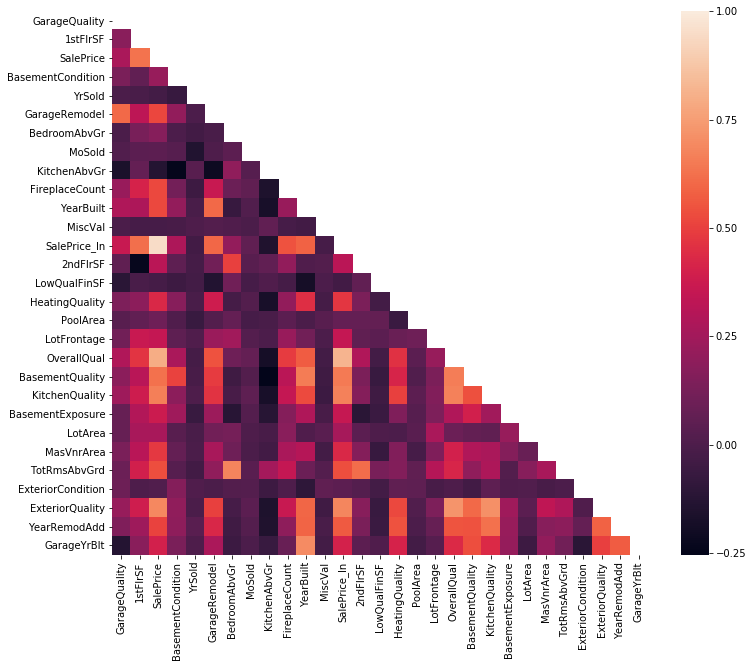

In [218]:
mask = np.zeros_like(train_std[list(set(save_list) & set(train_std.columns))].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (12,10))
sns.heatmap(train_std[list(set(save_list) & set(train_std.columns))].corr(), mask = mask)
plt.show()

In [219]:
train_std = train_std.loc[:,(train_std.columns != "SalePrice") & (train_std.columns != "SalePrice_ln")]

In [220]:
train_std.shape

(1458, 127)

# Model : Lasso to find most important variables, followed by a Ridge

In [221]:
def rmse(estimator, X, y):
    preds = estimator.predict(X)
    return np.sqrt(np.mean((preds - y)**2))

In [222]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
rreg = Lasso()

In [223]:
from sklearn.model_selection import cross_val_score

rreg_scores = []
for a in [0.00001,0.0001,0.001,0.01,0.1,1,10,100]:
    rreg.set_params(alpha = a) 
    scores = cross_val_score(estimator = rreg ,scoring = rmse, X = train_std, y = y_train, cv = 10)
    rreg_scores.append((np.mean(scores),a))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [224]:
min(rreg_scores)

(0.1218117070391552, 0.0001)

In [225]:
rreg = Ridge(alpha = min(rreg_scores)[1])

In [226]:
rreg.fit(train_std, y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

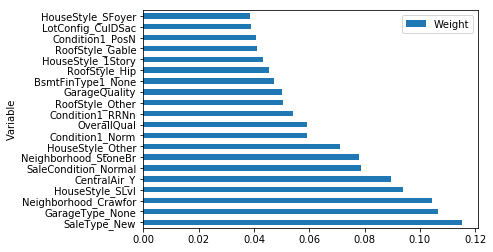

<Figure size 1440x1440 with 0 Axes>

In [227]:
coeffs = pd.DataFrame({
    "Variable": train_std.columns,
    "Weight": rreg.coef_    
}).sort_values(by = "Weight", ascending = False)

coeffs.head(50)

coeffs.head(20).plot(kind = "barH", x = "Variable")
plt.figure(figsize = (20,20))
plt.show()

In [228]:
#train_std.total_sqft
list(coeffs["Variable"])[:85]

['SaleType_New',
 'GarageType_None',
 'Neighborhood_Crawfor',
 'HouseStyle_SLvl',
 'CentralAir_Y',
 'SaleCondition_Normal',
 'Neighborhood_StoneBr',
 'HouseStyle_Other',
 'Condition1_Norm',
 'OverallQual',
 'Condition1_RRNn',
 'RoofStyle_Other',
 'GarageQuality',
 'BsmtFinType1_None',
 'RoofStyle_Hip',
 'HouseStyle_1Story',
 'RoofStyle_Gable',
 'Condition1_PosN',
 'LotConfig_CulDSac',
 'HouseStyle_SFoyer',
 'HouseStyle_2Story',
 'SaleType_Other',
 'RoofMatl_Other',
 'Condition1_RRAn',
 'total_baths',
 'Neighborhood_NridgHt',
 'Foundation_PConc',
 'SaleCondition_Other',
 'BasementCondition',
 'Foundation_Other',
 'Condition1_Feedr',
 'KitchenQuality',
 'Fence_MnWw',
 'PavedDrive_P',
 'BasementExposure',
 'PavedDrive_Y',
 'Fence_None',
 'HeatingQuality',
 'Foundation_CBlock',
 'Condition1_PosA',
 'Fence_MnPrv',
 'ExteriorCondition',
 'Neighborhood_ClearCr',
 'BasementQuality',
 'FireplaceCount',
 'SaleCondition_Partial',
 'TotRmsAbvGrd',
 'ExteriorQuality',
 'GarageType_Detchd',
 'Garage

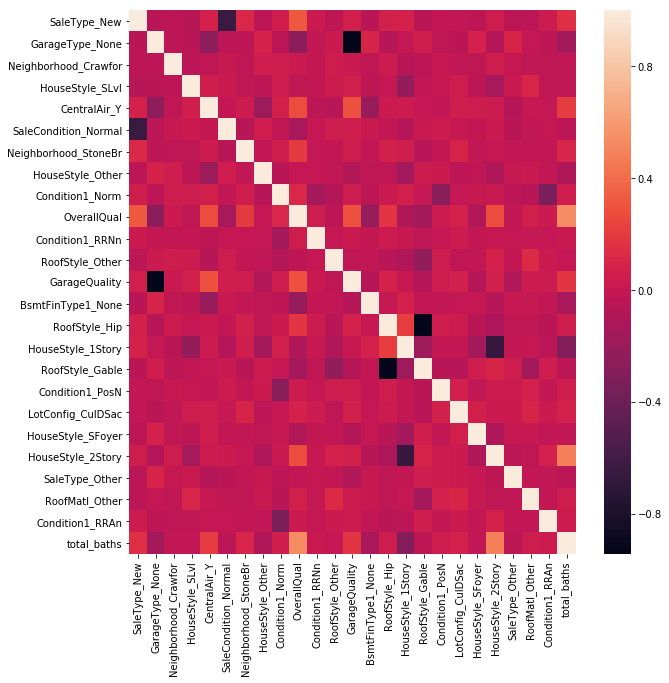

In [229]:
plt.figure(figsize = (10,10))
sns.heatmap(train_std.loc[:,list(coeffs["Variable"])[:25]].corr())

In [230]:
bad_items = ['Neighborhood_ClearCr', 'Neighborhood_SWISU', 'RoofStyle_Gable', 'total_sqft']

In [231]:
#from sklearn.linear_model import Ridge

In [232]:
rreg = Ridge()

In [233]:
from sklearn.model_selection import cross_val_score

rreg_scores1 = []
for a in [0.00001,0.0001,0.001,0.01,0.1,1,10,100]:
    for n in [45,55,65,75,85,95,105]:
        rreg.set_params(alpha = a) #note use of .set_params() method
        scores = cross_val_score(estimator = rreg,scoring = rmse, X = train_std.loc[:,list(set(list(coeffs["Variable"])[:n]) - set(bad_items))], y = y_train, cv = 10)
        rreg_scores1.append((np.mean(scores),a,n))

In [234]:
min(rreg_scores1)

(0.12828233094419236, 10, 95)

In [235]:
#print party 

In [236]:
# from sklearn.linear_model import Ridge
rreg = Ridge(alpha = min(rreg_scores1)[1])

In [237]:
rreg.fit(train_std.loc[:,list(set(list(coeffs["Variable"])[:min(rreg_scores1)[2]]) - set(bad_items))],y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [238]:
test_std.columns[test_std.isnull().any()].tolist()

['total_sqft']

In [239]:
test_std["predict"] = rreg.predict(test_std.loc[:,list(set(list(coeffs["Variable"])[:min(rreg_scores1)[2]]) - set(bad_items))])

In [240]:
 output = pd.DataFrame({
    'Id':np.arange(1461,2920),
    'SalePrice':np.exp(test_std.predict)
})

In [241]:
path = "/Users/theodoreplotkin/desktop/postmalone/idaho_ridge.csv"

output.to_csv(path, index = False)

In [242]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

In [245]:
#y_train.std()